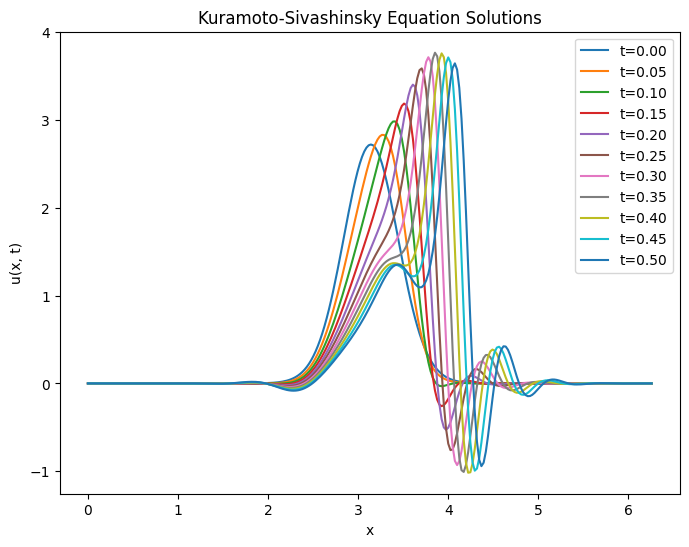

In [19]:
import numpy as np
import matplotlib.pyplot as plt

# Constants and parameters
alpha = 0.1
beta = 1e-3
N = 256
L = 2 * np.pi
h = L / N
dt = 1e-5
n_snapshots = 401
snapshots_at = np.linspace(0, 20, n_snapshots)
snapshots_indices = np.array(snapshots_at / dt, dtype=int)
timesteps = snapshots_at[1] - snapshots_at[0]

# Function to compute the right-hand side of the KS equation
def F(u):
    u_fft = np.fft.rfft(u)
    ux = np.fft.irfft(1j * k * u_fft)
    uxx = np.fft.irfft(-k ** 2 * u_fft).real
   # uxxx = np.fft.ifft(1j * k ** 3 * u_fft).real
    uxxxx = np.fft.irfft(k**4 * u_fft).real
    return -alpha * uxx - beta * uxxxx - u * ux

# Function to perform RK4 with the given function F
def perform_rk4(u, dt):
    k1 = dt * F(u)
    k2 = dt * F(u + (2 / 5) * k1)
    k3 = dt * F(u + (-3 / 20) * k1 + 3 / 4 * k2)
    k4 = dt * F(u + 19 / 44 * k1 - 15 / 44 * k2 + 40 / 44 * k3)
    return k1, k2, k3, k4

# Initial condition
x = np.linspace(0, L - h, N)
u = np.exp(-10 - 11 * np.cos(x))

# Fast Fourier Transform setup
k = np.fft.fftfreq(N, h) * 2 * np.pi

k = np.arange (0,N//2+1)
k[-1] = 0


Lap = -(alpha * k ** 2 + beta * k ** 4)

# RK4 time-stepping loop
plt.figure(figsize=(8, 6))  # Set the figure size

for i in range(n_snapshots):
    if i < 11:
        plt.plot(x, u, label=f"t={snapshots_at[i]:.2f}")  # Plot the first 11 snapshots with different colors
    elif i in snapshots_indices:
        plt.plot(x, u, label=f"t={snapshots_at[i]:.2f}", alpha=0.5)  # Plot snapshots at specified times with reduced opacity

    for _ in range (5000):
          k1, k2, k3, k4 = perform_rk4(u, dt)

          u += 11 / 72 * k1 + 25 / 72 * k2 + 25 / 72 * k3 + 11 / 72 * k4

plt.title("Kuramoto-Sivashinsky Equation Solutions")
plt.xlabel("x")
plt.ylabel("u(x, t)")
plt.legend()
plt.show()

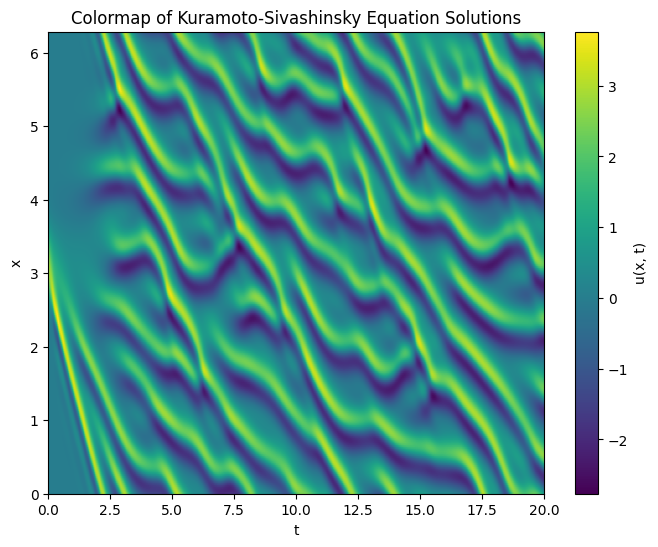

In [22]:
import numpy as np
import matplotlib.pyplot as plt

# Constants and parameters
alpha = 0.1
beta = 1e-3
N = 256
L = 2 * np.pi
h = L / N
dt = 1e-5
n_snapshots = 401
snapshots_at = np.linspace(0, 20, n_snapshots)
snapshots_indices = np.array(snapshots_at / dt, dtype=int)
timesteps = snapshots_at[1] - snapshots_at[0]

# Function to compute the right-hand side of the KS equation
def F(u):
    u_fft = np.fft.rfft(u)
    ux = np.fft.irfft(1j * k * u_fft)
    uxx = np.fft.irfft(-k ** 2 * u_fft).real
    uxxxx = np.fft.irfft(k ** 4 * u_fft).real
    return -alpha * uxx - beta * uxxxx - u * ux

# Function to perform RK4 with the given function F
def perform_rk4(u, dt):
    k1 = dt * F(u)
    k2 = dt * F(u + (2 / 5) * k1)
    k3 = dt * F(u + (-3 / 20) * k1 + 3 / 4 * k2)
    k4 = dt * F(u + 19 / 44 * k1 - 15 / 44 * k2 + 40 / 44 * k3)
    return k1, k2, k3, k4

# Initial condition
x = np.linspace(0, L - h, N)
u = np.exp(-10 - 11 * np.cos(x))

# Fast Fourier Transform setup
k = np.fft.fftfreq(N, h) * 2 * np.pi
k = np.arange(0, N // 2 + 1)
k[-1] = 0

# Create a 2D grid to store u(x, t) solutions
u_grid = np.zeros((n_snapshots, N))

# RK4 time-stepping loop to populate the u_grid
for i in range(n_snapshots):
    u_grid[i] = u.copy()  # Store the solution at each time step

    for _ in range(5000):
        k1, k2, k3, k4 = perform_rk4(u, dt)
        u += 11 / 72 * k1 + 25 / 72 * k2 + 25 / 72 * k3 + 11 / 72 * k4

# Plotting the colormap
plt.figure(figsize=(8, 6))
plt.imshow(u_grid.T, extent=[0, 20, 0, L], aspect='auto', cmap='viridis')
plt.colorbar(label='u(x, t)')
plt.title("Colormap of Kuramoto-Sivashinsky Equation Solutions")
plt.xlabel("t")
plt.ylabel("x")
plt.show()


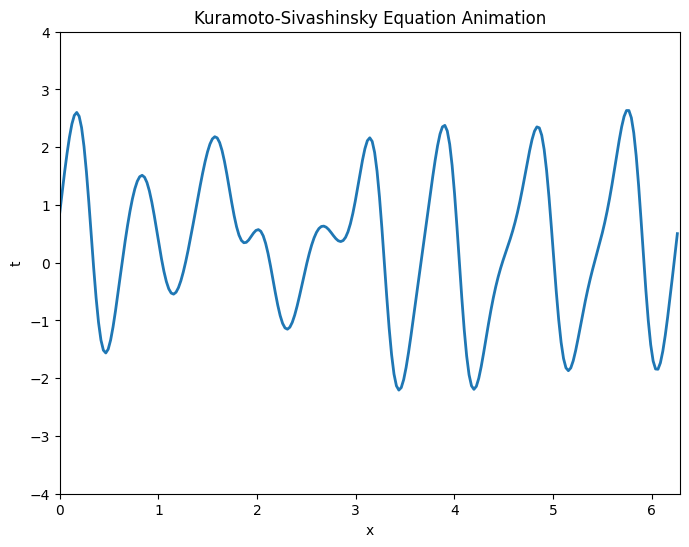

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Constants and parameters
alpha = 0.1
beta = 1e-3
N = 256
L = 2 * np.pi
h = L / N
dt = 1e-5
n_snapshots = 401
snapshots_at = np.linspace(0, 20, n_snapshots)
snapshots_indices = np.array(snapshots_at / dt, dtype=int)
timesteps = snapshots_at[1] - snapshots_at[0]

# Function to compute the right-hand side of the KS equation
def F(u):
    u_fft = np.fft.rfft(u)
    ux = np.fft.irfft(1j * k * u_fft)
    uxx = np.fft.irfft(-k ** 2 * u_fft).real
    uxxxx = np.fft.irfft(k ** 4 * u_fft).real
    return -alpha * uxx - beta * uxxxx - u * ux

# Function to perform RK4 with the given function F
def perform_rk4(u, dt):
    k1 = dt * F(u)
    k2 = dt * F(u + (2 / 5) * k1)
    k3 = dt * F(u + (-3 / 20) * k1 + 3 / 4 * k2)
    k4 = dt * F(u + 19 / 44 * k1 - 15 / 44 * k2 + 40 / 44 * k3)
    return k1, k2, k3, k4

# Initial condition
x = np.linspace(0, L - h, N)
u = np.exp(-10 - 11 * np.cos(x))

# Fast Fourier Transform setup
k = np.fft.fftfreq(N, h) * 2 * np.pi
k = np.arange(0, N // 2 + 1)
k[-1] = 0

# Create a 2D grid to store u(x, t) solutions
u_grid = np.zeros((n_snapshots, N))

# RK4 time-stepping loop to populate the u_grid
for i in range(n_snapshots):
    u_grid[i] = u.copy()  # Store the solution at each time step

    for _ in range(5000):
        k1, k2, k3, k4 = perform_rk4(u, dt)
        u += 11 / 72 * k1 + 25 / 72 * k2 + 25 / 72 * k3 + 11 / 72 * k4

# Create a figure and axis for the animation
fig, ax = plt.subplots(figsize=(8, 6))
ax.set_xlim(0, L)
ax.set_ylim(-4, 4)
ax.set_title("Kuramoto-Sivashinsky Equation Animation")
ax.set_xlabel("x")
ax.set_ylabel("t")
line, = ax.plot([], [], lw=2)

# Function to update the animation at each frame
def update(frame):
    line.set_data(x, u_grid[frame])
    return line,

# Create the animation
anim = FuncAnimation(fig, update, frames=n_snapshots, interval=50)

# Save the animation as a .mov file
anim.save('ks_animation.mov', fps=30, extra_args=['-vcodec', 'libx264'])

# Display the animation (optional)
plt.show()
